# AAGB TME1: Needleman & Wunsch
#### By: Yann Zhong 28710333
#### Exercices done: 1, 2

In [280]:
import numpy as np   
import math

In [2]:
# EXERCICE 1.1
def distance_matrix(alphabet,match,mismatch):
    
    dim = len(alphabet)
    dm = np.zeros((dim,dim))
    
    for n in range(dim):
        for m in range(dim):                
            dm[n][m] = match if n == m else mismatch
        '''if alphabet[n] == 'T':
            dm[n][n] = 4*match ''' # add if needing different matching values
            
    return dm

In [254]:
atcgudm = distance_matrix("ATCGU",1,-1)
# aadm = distance_matrix(1,-1)

print(atcgudm)
print(len(atcgudm))
print(atcgudm.shape)

[[ 1. -1. -1. -1. -1.]
 [-1.  1. -1. -1. -1.]
 [-1. -1.  1. -1. -1.]
 [-1. -1. -1.  1. -1.]
 [-1. -1. -1. -1.  1.]]
5
(5, 5)


In [125]:
# EXERCICE 1.2, 1.3 and 1.5 without 1.4
import numpy as np
import math

def score_matrix(seqone, seqtwo, dm, penalty, alphabet): 
    # inputs: two sequences, distance matrix, gap penalty value, alphabet
    
    # SCORE MATRIX
    dim1 = len(seqone)
    dim2 = len(seqtwo)
    
    sm = np.zeros((dim1+1, dim2+1)) # score matrix
    comp = np.zeros(((dim1, dim2, 3))) # parallel matrix to store every score value per compared pair
    scores = [0,0,0] # array to store 3 score values for one cell per iteration
    
    for i in range(dim1+1):
        sm[i][0] = i*penalty # initialisation première colonne
    for j in range(dim2+1):
        sm[0][j] = j*penalty # initialisation première ligne
           
    for i in range(1,dim1+1):
        for j in range(1,dim2+1):
            
            scores[0] = sm[i-1][j-1] + dm[alphabet.index(seqone[i-1])][alphabet.index(seqtwo[j-1])]
            scores[1] = sm[i-1][j] + penalty # left
            scores[2] = sm[i][j-1] + penalty # up
            
            sm[i][j] = max(scores) # give the current cell the highest of the 3 neighboring values
            comp[i-1][j-1] = scores # store all scores excluding first row and col
    
    # ------------------------------------------------------------------------------------------------
    # TRACEBACK
    
    pm = np.zeros((dim1+1, dim2+1)) # path matrix to construct alongside 
    cell = []

    si = dim1 # can't be dim1 + 1 since iterations start at 0, not 1
    sj = dim2 # same here
    
    while True:
        if (si == 0 and sj == 0): # break out of loop when upper left corner is reached
            pm[si][sj] = 1
            break
        if(sj == 0): # if we've reached the left side, we can only continue going up
            while si != 0: # while we haven't reached the top yet
                pm[si][sj] = 1
                si -=1
                # print("↑")
            pm[si][sj] = 1
            break
        if(si == 0): # if we've reached the top side, we can only continue going left
            while sj != 0: # while we haven't reached the left yet
                pm[si][sj] = 1
                sj -=1
                # print("←")
            pm[si][sj] = 1
            break
        
        pm[si][sj] = 1 # marks path with a 1
        cell = comp[si-1][sj-1] # puts scores of the cell inside cell variable
        max_value = np.max(cell) # get max value in ndarray
        path = np.where(cell == max_value) # check index of the highest score inside cell
        
        if len(path[0]) == 1: # if only one max value is found
            check = path[0]
        if len(path[0]) >= 2: # if two max values are found
            check = path[0][0] # only take the first max value (for now)
            
        if check == 0: # if max value is on the diagonal
            si -= 1
            sj -= 1
            # print("↖")
        if check == 1: # if max value is above
            si -= 1
            # print("↑")
        if check == 2: # if max value is to the left
            sj -= 1
            # print("←")
    
    # write out alignement
    top_sequence = ""
    bottom_sequence = ""
    comparison = ""
    alignement = [top_sequence, bottom_sequence, comparison]
    
    for i in range(pm.shape[0]): # look through the path matrix
        for j in range(pm.shape[1]):
            if pm[i][j] == 1:
                if i == 0 and j != 0: # if we're looking at the first line
                    if pm[i][j-1] == 1: # is the cell to the left part of the path? 
                        alignement[0] += "_" # put gap in first sequence
                        alignement[1] += seqtwo[j-1] # take letter of second sequence
                        alignement[2] += " "# put blank space in generated path sequence

                if j == 0 and i != 0: # if we're looking at the first column
                    if pm[i-1][j] == 1: # is the cell above part of the path?
                        alignement[0] += seqone[i-1] # take letter of first sequence
                        alignement[1] += "_" # put gap in second sequence
                        alignement[2] += " "# put blank space in generated path sequence

                if i != 0 and j != 0: # anything but the top left corner
                    if pm[i-1][j-1] == 1: # is the top left cell part of the path?
                        alignement[0] += seqone[i-1] # take letter of first sequence
                        alignement[1] += seqtwo[j-1] # take letter of second sequence

                        if seqone[i-1] == seqtwo[j-1]: # match
                            alignement[2] += "*" # put star space in generated path sequence
                        if seqone[i-1] != seqtwo[j-1]: # mismatch
                            alignement[2] += "|" # put mismatch space in generated path sequence

                    if pm[i][j-1] == 1: # is the cell to the left part of the path? 
                        alignement[0] += "_" # put gap in first sequence
                        alignement[1] += seqtwo[j-1] # take letter of second sequence
                        alignement[2] += " "# put blank space in generated path sequence
                    if pm[i-1][j] == 1: # is the cell above part of the path?
                        alignement[0] += seqone[i-1] # take letter of first sequence
                        alignement[1] += "_" # put gap in second sequence
                        alignement[2] += " "# put blank space in generated path sequence
            
    return sm,pm,sm[dim1][dim2], alignement

In [126]:
sm,path,score,align = score_matrix("GATTACA", "GCATGCU", atcgudm, -1, "ATCGU") 

print(sm)
print("Score Matrix shown above", '\n')
print(path)
print("Path Matrix shown above, 1 = first path", '\n')
print(score)
print("Score given by bottom right value", '\n' )
print(align[0])
print(align[2])
print(align[1])

[[ 0. -1. -2. -3. -4. -5. -6. -7.]
 [-1.  1.  0. -1. -2. -3. -4. -5.]
 [-2.  0.  0.  1.  0. -1. -2. -3.]
 [-3. -1. -1.  0.  2.  1.  0. -1.]
 [-4. -2. -2. -1.  1.  1.  0. -1.]
 [-5. -3. -3. -1.  0.  0.  0. -1.]
 [-6. -4. -2. -2. -1. -1.  1.  0.]
 [-7. -5. -3. -1. -2. -2.  0.  0.]]
Score Matrix shown above 

[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]]
Path Matrix shown above, 1 = first path 

0.0
Score given by bottom right value 

G_ATTACA
* * *|*|
GCA_TGCU


In [147]:
sm,path,score,align = score_matrix("TCTGAAC", "CATGAC", atcgudm, -1, "ATCGU") 

print(sm)
print("Score Matrix shown above", '\n')
print(path)
print("Path Matrix shown above, 1 = first path", '\n')
print(score)
print("Score given by bottom right value", '\n' )
print(align[0])
print(align[2])
print(align[1])
print("Alignement", '\n' )

[[ 0. -1. -2. -3. -4. -5. -6.]
 [-1. -1. -2. -1. -2. -3. -4.]
 [-2.  0. -1. -2. -2. -3. -2.]
 [-3. -1. -1.  0. -1. -2. -3.]
 [-4. -2. -2. -1.  1.  0. -1.]
 [-5. -3. -1. -2.  0.  2.  1.]
 [-6. -4. -2. -2. -1.  1.  1.]
 [-7. -5. -3. -3. -2.  0.  2.]]
Score Matrix shown above 

[[1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1.]]
Path Matrix shown above, 1 = first path 

2.0
Score given by bottom right value 

TC_TGAAC
 * ** **
_CATG_AC
Alignement 



In [134]:
sm,path,score, align = score_matrix("GAT", "TAAT", atcgudm, -1, "ATCGU") 

print(sm)
print("Score Matrix shown above", '\n')
print(path)
print("Path Matrix shown above, 1 = first path", '\n')
print(score)
print("Score given by bottom right value", '\n' )
print(align[0])
print(align[2])
print(align[1])
print("Alignement", '\n' )

[[ 0. -1. -2. -3. -4.]
 [-1. -1. -2. -3. -4.]
 [-2. -2.  0. -1. -2.]
 [-3. -1. -1. -1.  0.]]
Score Matrix shown above 

[[1. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]
Path Matrix shown above, 1 = first path 

0.0
Score given by bottom right value 

_GAT
 |**
TAAT
Alignement 



In [135]:
sm,path,score,align = score_matrix("ATTCG", "GAAATT", atcgudm, -1, "ATCGU")

print(sm)
print("Score Matrix shown above", '\n')
print(path)
print("Path Matrix shown above, 1 = first path", '\n')
print(score)
print("Score given by bottom right value", '\n' )
print(align[0])
print(align[2])
print(align[1])
print("Alignement", '\n' )

[[ 0. -1. -2. -3. -4. -5. -6.]
 [-1. -1.  0. -1. -2. -3. -4.]
 [-2. -2. -1. -1. -2. -1. -2.]
 [-3. -3. -2. -2. -2. -1.  0.]
 [-4. -4. -3. -3. -3. -2. -1.]
 [-5. -3. -4. -4. -4. -3. -2.]]
Score Matrix shown above 

[[1. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]]
Path Matrix shown above, 1 = first path 

-2.0
Score given by bottom right value 

___ATTCG
   ***  
GAAATT__
Alignement 



In [1]:
# EXERCICE 1.4 AND 1.5
import numpy as np
import math

def score_matrix_gap(seqone, seqtwo, dm, gap_opening, gap_extension, alphabet): 
    # inputs: two sequences, distance matrix, gap opening penalty value, gap extension penalty value, alphabet
    
    # SCORE MATRIX
    dim1 = len(seqone)
    dim2 = len(seqtwo)
    
    sm = np.zeros((dim1+1, dim2+1)) # score matrix
    comp = np.zeros(((dim1, dim2, 3))) # parallel matrix to store every score value per compared pair
    scores = [0,0,0] # array to store 3 score values for one cell per iteration

    sm[1][0] = gap_opening
    sm[0][1] = gap_opening
    for i in range(2,dim1+1):
        sm[i][0] = gap_opening + (i-1)*gap_extension # initialisation première colonne
    for j in range(2,dim2+1):
        sm[0][j] = gap_opening + (j-1)*gap_extension # initialisation première ligne
    
    flag = 1 # boolean to check if previous cell was opened or not
    for i in range(1,dim1+1):
        for j in range(1,dim2+1):
            scores[0] = sm[i-1][j-1] + dm[alphabet.index(seqone[i-1])][alphabet.index(seqtwo[j-1])]

            if flag == 0:
                scores[1] = sm[i-1][j] + gap_opening # left
                scores[2] = sm[i][j-1] + gap_opening # up
            
            else: 
                scores[1] = sm[i-1][j] + gap_extension # left
                scores[2] = sm[i][j-1] + gap_extension # up
            
            sm[i][j] = max(scores) # give the current cell the highest of the 3 neighboring values
            comp[i-1][j-1] = scores # store all scores excluding first row and col
            
            if sm[i][j] == scores[0]: # if previous value was a diagonal argmax
                flag = 0 # make sure the next applied penalty is a gap opening
            if sm[i][j] == scores[1] or sm[i][j] == scores[2]:
                flag = 1 
    
    # ------------------------------------------------------------------------------------------------
    # TRACEBACK
    
    pm = np.zeros((dim1+1, dim2+1)) # path matrix to construct alongside 
    cell = []

    si = dim1 # can't be dim1 + 1 since iterations start at 0, not 1
    sj = dim2 # same here
    
    while True:
        if (si == 0 and sj == 0): # break out of loop when upper left corner is reached
            pm[si][sj] = 1
            break
        if(sj == 0): # if we've reached the left side, we can only continue going up
            while si != 0: # while we haven't reached the top yet
                pm[si][sj] = 1
                si -=1
                # print("↑")
            pm[si][sj] = 1
            break
        if(si == 0): # if we've reached the top side, we can only continue going left
            while sj != 0: # while we haven't reached the left yet
                pm[si][sj] = 1
                sj -=1
                # print("←")
            pm[si][sj] = 1
            break
        
        pm[si][sj] = 1 # marks path with a 1
        cell = comp[si-1][sj-1] # puts scores of the cell inside cell variable
        max_value = np.max(cell) # get max value in ndarray
        path = np.where(cell == max_value) # check index of the highest score inside cell
        
        if len(path[0]) == 1: # if only one max value is found
            check = path[0]
        if len(path[0]) >= 2: # if two max values are found
            check = path[0][0] # only take the first max value (for now)
            
        if check == 0: # if max value is on the diagonal
            si -= 1
            sj -= 1
            # print("↖")
        if check == 1: # if max value is above
            si -= 1
            # print("↑")
        if check == 2: # if max value is to the left
            sj -= 1
            # print("←")
    
    # write out alignement
    top_sequence = ""
    bottom_sequence = ""
    comparison = ""
    alignement = [top_sequence, bottom_sequence, comparison]
    
    for i in range(pm.shape[0]): # look through the path matrix
        for j in range(pm.shape[1]):
            if pm[i][j] == 1:
                if i == 0 and j != 0: # if we're looking at the first line
                    if pm[i][j-1] == 1: # is the cell to the left part of the path? 
                        alignement[0] += "_" # put gap in first sequence
                        alignement[1] += seqtwo[j-1] # take letter of second sequence
                        alignement[2] += " "# put blank space in generated path sequence

                if j == 0 and i != 0: # if we're looking at the first column
                    if pm[i-1][j] == 1: # is the cell above part of the path?
                        alignement[0] += seqone[i-1] # take letter of first sequence
                        alignement[1] += "_" # put gap in second sequence
                        alignement[2] += " "# put blank space in generated path sequence

                if i != 0 and j != 0: # anything but the top left corner
                    if pm[i-1][j-1] == 1: # is the top left cell part of the path?
                        alignement[0] += seqone[i-1] # take letter of first sequence
                        alignement[1] += seqtwo[j-1] # take letter of second sequence

                        if seqone[i-1] == seqtwo[j-1]: # match
                            alignement[2] += "*" # put star space in generated path sequence
                        if seqone[i-1] != seqtwo[j-1]: # mismatch
                            alignement[2] += "|" # put mismatch space in generated path sequence

                    if pm[i][j-1] == 1: # is the cell to the left part of the path? 
                        alignement[0] += "_" # put gap in first sequence
                        alignement[1] += seqtwo[j-1] # take letter of second sequence
                        alignement[2] += " "# put blank space in generated path sequence
                    if pm[i-1][j] == 1: # is the cell above part of the path?
                        alignement[0] += seqone[i-1] # take letter of first sequence
                        alignement[1] += "_" # put gap in second sequence
                        alignement[2] += " "# put blank space in generated path sequence
            
    return sm,pm,sm[dim1][dim2], alignement

In [155]:
sm,path,score,align = score_matrix_gap("GATTACA", "GCATGCU", atcgudm, -5, -1, "ATCGU") 

print(sm)
print("Score Matrix shown above", '\n')
print(path)
print("Path Matrix shown above, 1 = first path", '\n')
print(score)
print("Score given by bottom right value", '\n' )
print(align[0])
print(align[2])
print(align[1])
print("Alignement", '\n' )

[[  0.  -5.  -6.  -7.  -8.  -9. -10. -11.]
 [ -5.   1.  -4.  -5.  -6.  -7. -10. -11.]
 [ -6.  -4.   0.  -3.  -6.  -7.  -8. -11.]
 [ -7.  -7.  -5.  -1.  -2.  -7.  -8.  -9.]
 [ -8.  -8.  -8.  -6.   0.  -3.  -8.  -9.]
 [ -9.  -9.  -9.  -7.  -5.  -1.  -4.  -9.]
 [-10. -10.  -8. -10.  -8.  -6.   0.  -5.]
 [-11. -11. -11.  -7. -11.  -9.  -5.  -1.]]
Score Matrix shown above 

[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]]
Path Matrix shown above, 1 = first path 

-1.0
Score given by bottom right value 

GATTACA
*||*|*|
GCATGCU
Alignement 



In [154]:
sm,path,score,align = score_matrix_gap("TCTGAAC", "CATGAC", atcgudm, -5, -1, "ATCGU") 

print(sm)
print("Score Matrix shown above", '\n')
print(path)
print("Path Matrix shown above, 1 = first path", '\n')
print(score)
print("Score given by bottom right value", '\n' )
print(align[0])
print(align[2])
print(align[1])
print("Alignement", '\n' )

[[  0.  -5.  -6.  -7.  -8.  -9. -10.]
 [ -5.  -1.  -6.  -5.  -8.  -9. -10.]
 [ -6.  -4.  -2.  -7.  -6.  -9.  -8.]
 [ -7.  -7.  -5.  -1.  -6.  -7. -10.]
 [ -8.  -8.  -8.  -6.   0.  -5.  -6.]
 [ -9.  -9.  -7.  -9.  -5.   1.  -4.]
 [-10. -10.  -8.  -8. -10.  -4.   0.]
 [-11.  -9. -11.  -9.  -9.  -9.  -1.]]
Score Matrix shown above 

[[1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]]
Path Matrix shown above, 1 = first path 

-1.0
Score given by bottom right value 

TCTGAAC
||***| 
CATGAC_
Alignement 



In [2]:
# EXERCICE 2.1
from io import StringIO
import numpy as np

# prot_nb = np.zeros(23) 
# for i in range(23): # don't need the last column (*)
#    prot_nb[i] = i+1 
# prot_nb = list(map(int, prot_nb))

# blosum62 = np.loadtxt('BLOSUM62.txt',skiprows=7, usecols = prot_nb )
# blosum62 = np.delete(blosum62,23, axis = 0) # don't need the last line
# print(blosum62.shape)

blosum62 = np.loadtxt ( "BLOSUM62.txt", delimiter=',', dtype=np.str )
blosum62_dm = np.zeros((len(blosum62),len(blosum62)))
for i in range(len(blosum62)):
    for j in range(len(blosum62)):
        blosum62_dm[i][j]=int(blosum62[i].split()[j])

protein_alphabet = "ARNDCQEGHILKMFPSTWYVBZX*" # load the protein alphabet, in order
sequence_one = "MGPSENDPNLFVALYDFVASGDNTLSITKGEKLRVLGYNHNGEWCEAQTKNGQGWVPSNYITPVNSLEKHSWYHGPVSRNAAEYLLSSGINGSFLVRESESSPGQRSISLRYEGRVYHYRINTASDGKLYVSSESRFNTLAELVHHHSTVADGLITTLHYPAP"
sequence_two = "GAMDPSEALQRPVASDFEPQGLSEAARWNSKENLLAGPSENDPNLFVALYDFVASGDNTLSITKGEKLRVLGYNHNGEWCEAQTKNGQGWVPSNYITPVNSLEKHSWYHGPVSRNAAEYLLSSGINGSFLVRESESSPGQRSISLRYEGRVYHYRINTASDGKLYVSSESRFNTLAELVHHHSTVADGLITTLHYPAPKRNKPTIYGVSPNYDKWEMERTDITMKHKLGGGQYGEVYEGVWKKYSLTVAVKTLKEDTMEVEEFLKEAAVMKEIKHPNLVQLLGVCTREPPFYIITEFMTYGNLLDYLRECNRQEVSAVVLLYMATQISSAMEYLEKKNFIHRNLAARNCLVGENHLVKVADFGLSRLMTGDTYTAHAGAKFPIKWTAPESLAYNKFSIKSDVWAFGVLLWEIATYGMSPYPGIDLSQVYELLEKDYRMERPEGCPEKVYELMRACWQWNPSDRPSFAEIHQAFETMFQESSISDEVEKELGKRGT"

In [3]:
# EXERCICE 2.2
sm,path,score,align = score_matrix_gap(sequence_one, sequence_two, blosum62_dm, -11, -1, protein_alphabet) 

print(sm)
print("Score Matrix shown above", '\n')
print(path)
print("Path Matrix shown above, 1 = first path", '\n')
print(score)
print("Score given by bottom right value", '\n' )
print(align[0])
print(align[2])
print(align[1])
print("Alignement", '\n' )

[[   0.  -11.  -12. ... -503. -504. -505.]
 [ -11.   -3.  -12. ... -503. -506. -505.]
 [ -12.   -5.   -3. ... -503. -497. -508.]
 ...
 [-171. -164. -159. ...  502.  501.  500.]
 [-172. -165. -160. ...  507.  506.  505.]
 [-173. -166. -161. ...  515.  514.  513.]]
Score Matrix shown above 

[[1. 1. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]]
Path Matrix shown above, 1 = first path 

513.0
Score given by bottom right value 

___________________________________MGPSENDPNLFVALYDFVASGDNTLSITKGEKLRVLGYNHNGEWCEAQTKNGQGWVPSNYITPVNSLEKHSWYHGPVSRNAAEYLLSSGINGSFLVRESESSPGQRSISLRYEGRVYHYRINTASDGKLYVSSESRFNTLAELVHHHSTV___________A_______________________D_________________G__________________________________________L___________I____T_________________________T_________________________________________L________H___________________________________________________________Y________P________A_________P_____

#### Results compared to BLAST
Depending on which alignements are put at the top and bottom: 
- score of 416 if the longer sequence is at the left side and shorter sequence is at the top side
- score of 505 if the longer sequence is at the top side and shorter sequence is at the left side

BLAST only returns one score of 511 for a length of 163 and the same parameters. The score is very similar but varies by a few if we consider taking the higher score of the two above implementations. Note that this is for the optimal path where priority is given to diagonals (matches and mismatches over gaps).
The BLAST alignement gives an ideal alignement of GPSENDPNLFVALYDFVASGDNTLSITKGEKLRVLGYNHNGEWCEAQTKNGQGWVPSNYITPVNSLEKHSWYHGPVSRNAAEYLLSSGINGSFLVRESESSPGQRSISLRYEGRVYHYRINTASDGKLYVSSESRFNTLAELVHHHSTVADGLITTLHYPAP
(sorry for putting that big sequence above like that...)
My personal implementation returns the exact same alignement,
EXCEPT the last P, for some reason.. which it puts at the end of the alignement.
This is a bug which I did not manage to find the fix for, unfortunately, but if it was indeed fixed it would get very close to the BLAST score!

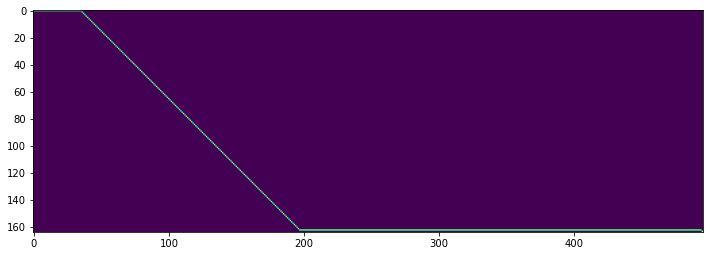

In [273]:
import matplotlib.pyplot as plt

#display matrix as a image
def imshow(I,title=None):
    """ display an image """
    plt.figure(figsize=(1000//80,1000//80))
    plt.imshow(I)
    if title: plt.title(title)
    plt.show
    
imshow(path)
# allows us to see the path given by the algorithm visually

In [276]:
a = "GAMDPSEALQRPVASDFEPQGLSEAARWNSKENLLA"
print(len(a))
b = "HHSTVADGLITTLHYPAP"
print(len(b))

36
18


#### Exercice 2.3

On the protein data bank, which we can see here: 
https://www.rcsb.org/3d-view/1OPK/1
https://www.rcsb.org/3d-view/2ABL/1
  
We can observe the following protein views:
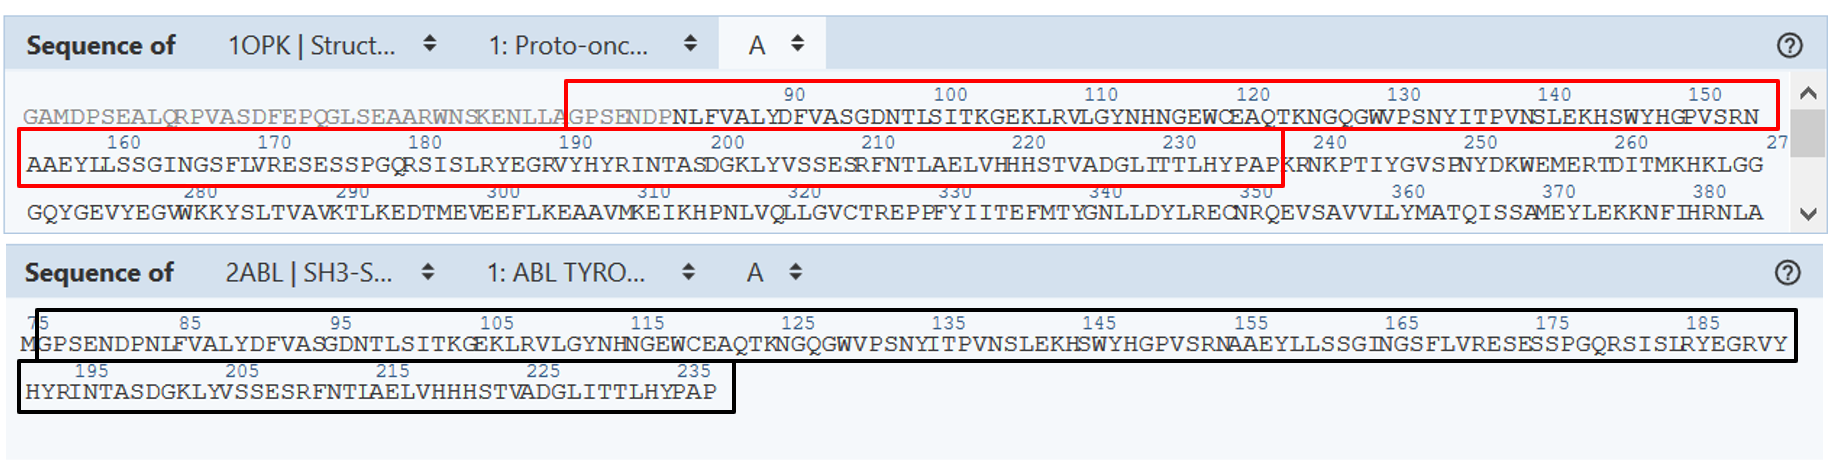

Thanks to the result from our previously implemented algorithm and the results found on BLAST, we can easily see that the shorter 2ABL sequence can be matched perfectly within the longer 10PK sequence.
Note that the only unmatched protein from the 2ABL sequence is M, which is at the very start of the sequence.

Both structures are also seemingly key components to the tyrosine kinase, which implies that structure and function are closely connected.
        
#### Exercice 2.4

BLAST is based on a heuristic approach, which means that it's reasonably faster while losing out on some degrees of precision. The NW algorithm, if implemented ideally, considers every possible score for every possible cell, which can vary greatly if the cost for opening a gap is significant compared to the cost for extending a gap. In my case my implementation lacks a bit to become optimal as:
- It only considers one path while calculating from the bottom right, prioritizing the diagonals when working up in cells that have multiple argmax indexes
- While constructing the score matrix again from the differently gap penalties, we prioritize assigning gap extension values even though we could apply gap opening values in certain cases, changing the entire score matrix, leading to other potential paths being formable.

BLAST is based on the Smith Waterman algorithm, which does calculations for scoring locally - low complexity regions are removed from the algorithm altogether, which is where information is lost.